# Technical Test

In [7]:
import numpy as np
import pandas as pd

raw_data = pd.read_csv('/home/komlan/Downloads/product-list_export_1629444041504.csv').drop(["Unnamed: 0"], axis=1)
raw_data

,Action,Type,Area,Size,Budget,Must,Nice,District
0,RENT,APARTMENT,DISTRICTS,"MEDIUM,LARGE","STANDARD,PREMIUM","Home<br>Appliances,Lift,Exterior,Terrace,Parqu...",NaN,"Eixample,Gracia"
1,SALE,HOUSE,ALL_CITY,SMALL,ECONOMY,"Refurbished,Lift,A/C,Balcony,Inbuilt Wardrobes...",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
2,RENT,APARTMENT,ALL_CITY,"LARGE,XLARGE","PREMIUM,LUXURY","Lift,Terrace,Garage,Parquet Floor",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
3,SALE,APARTMENT,DISTRICTS,MEDIUM,STANDARD,"Terrace,Open Kitchen,Penthouse",NaN,Les Corts
4,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
5,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD,PREMIUM","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
6,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
7,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM,LUXURY","Lift,A/C,Central Heating,Exterior,Balcony,Terrace",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
8,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM","Lift,A/C,Central Heating,Exterior,Balcony,Terrace",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
9,SALE,APARTMENT,DRAW_AREA,XLARGE,"STANDARD,PREMIUM,LUXURY","Lift,A/C,Central Heating,Exterior,Terrace,Furn...",NaN,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."


In [8]:
raw_data.describe()

,Action,Type,Area,Size,Budget,Must,Nice,District
count,8851,8851,8851,8388,8847,8851,1429,8851
unique,2,2,3,15,15,3042,516,237
top,SALE,APARTMENT,DISTRICTS,MEDIUM,STANDARD,"Lift,Terrace,Penthouse",Pets Allowed,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
freq,5165,7732,4810,2168,2169,394,127,4114


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8851 entries, 0 to 8850
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Action    8851 non-null   object
 1   Type      8851 non-null   object
 2   Area      8851 non-null   object
 3   Size      8388 non-null   object
 4   Budget    8847 non-null   object
 5   Must      8851 non-null   object
 6   Nice      1429 non-null   object
 7   District  8851 non-null   object
dtypes: object(8)
memory usage: 553.3+ KB


In [7]:
data = raw_data

Create bag of words as a text that will help us to calculate the similarity for each preferencies of customers

In [8]:
features = []
for i in range(data.shape[0]):
    value = ''
    for column in data.columns:
        value += str(data[column][i])+' '
    features.append(value)

data["new_features"] = features

data = data.reset_index()
data = data.rename(columns={"index":"Customer"})
data = data.fillna('')
data

,Customer,Action,Type,Area,Size,Budget,Must,Nice,District,new_features
0,0,RENT,APARTMENT,DISTRICTS,"MEDIUM,LARGE","STANDARD,PREMIUM","Home<br>Appliances,Lift,Exterior,Terrace,Parqu...",,"Eixample,Gracia","RENT APARTMENT DISTRICTS MEDIUM,LARGE STANDARD..."
1,1,SALE,HOUSE,ALL_CITY,SMALL,ECONOMY,"Refurbished,Lift,A/C,Balcony,Inbuilt Wardrobes...",,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...","SALE HOUSE ALL_CITY SMALL ECONOMY Refurbished,..."
2,2,RENT,APARTMENT,ALL_CITY,"LARGE,XLARGE","PREMIUM,LUXURY","Lift,Terrace,Garage,Parquet Floor",,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...","RENT APARTMENT ALL_CITY LARGE,XLARGE PREMIUM,L..."
3,3,SALE,APARTMENT,DISTRICTS,MEDIUM,STANDARD,"Terrace,Open Kitchen,Penthouse",,Les Corts,SALE APARTMENT DISTRICTS MEDIUM STANDARD Terra...
4,4,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...","RENT APARTMENT ALL_CITY SMALL,MEDIUM ECONOMY,S..."
...,...,...,...,...,...,...,...,...,...,...
8846,8846,RENT,APARTMENT,DISTRICTS,SMALL,STANDARD,"Furnished,Refurbished,Lift,A/C,Exterior,Balcon...",Double Glazed Windows,Eixample,RENT APARTMENT DISTRICTS SMALL STANDARD Furnis...
8847,8847,RENT,APARTMENT,ALL_CITY,SMALL,ECONOMY,"Exterior,Balcony,Terrace",,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",RENT APARTMENT ALL_CITY SMALL ECONOMY Exterior...
8848,8848,RENT,APARTMENT,DISTRICTS,,LUXURY,"Furnished,A/C,Central Heating,Penthouse",,Eixample,"RENT APARTMENT DISTRICTS nan LUXURY Furnished,..."
8849,8849,RENT,APARTMENT,DISTRICTS,,LUXURY,"Furnished,A/C,Central Heating",,Eixample,"RENT APARTMENT DISTRICTS nan LUXURY Furnished,..."


# 1- Machine Learning: Content based Cosins similarity

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
cm = vectorizer.fit_transform(data["new_features"])
cm

<8851x90 sparse matrix of type '<class 'numpy.int64'>'
	with 190568 stored elements in Compressed Sparse Row format>

In [11]:
from sklearn.metrics.pairwise import cosine_similarity
cs = cosine_similarity(cm)
cs

array([[1.        , 0.24253563, 0.45133547, ..., 0.39223227, 0.40824829,
        0.30638168],
       [0.24253563, 1.        , 0.77620586, ..., 0.14269545, 0.14852213,
        0.73246922],
       [0.45133547, 0.77620586, 1.        , ..., 0.28968273, 0.30151134,
        0.74348441],
       ...,
       [0.39223227, 0.14269545, 0.28968273, ..., 1.        , 0.96076892,
        0.30901572],
       [0.40824829, 0.14852213, 0.30151134, ..., 0.96076892, 1.        ,
        0.32163376],
       [0.30638168, 0.73246922, 0.74348441, ..., 0.30901572, 0.32163376,
        1.        ]])

Compute the top propertys that are similar to the user's choice

In [12]:
def recommandation(customer_id, cosine_sim=cs):
    recommands_property = []
    #Get the property that the customer_id interested to
    idx = data[data["Customer"] == customer_id].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_5_property = list(score_series.iloc[1:6].index)
    
    for i in top_5_property:
        property = data.loc[i, "Action"]+" "+data.loc[i, "Type"]+" "+data.loc[i, "Area"]+" "+data.loc[i, "Size"]+" "+data.loc[i, "Budget"]+" "+data.loc[i, "Must"]+" "+data.loc[i, "Nice"]+" "+data.loc[i, "District"]
        recommands_property.append([i, property])
    return recommands_property
    

In [13]:
customer_id = 2
recommands = recommandation(customer_id)
recommands

[[1905,
  'RENT APARTMENT ALL_CITY LARGE,XLARGE PREMIUM,LUXURY Lift,Central Heating,Terrace,Parquet Floor  Eixample,Gracia,Les Corts,Sarriá - St. Gervasi,Ciutat Vella,Sant Andreu,Horta - Guinardó,Nou barris,Sants,Sant Martí'],
 [4353,
  'RENT APARTMENT ALL_CITY XLARGE PREMIUM,LUXURY Terrace,Parquet Floor,Garden  Eixample,Gracia,Les Corts,Sarriá - St. Gervasi,Ciutat Vella,Sant Andreu,Horta - Guinardó,Nou barris,Sants,Sant Martí'],
 [524,
  'RENT APARTMENT ALL_CITY LARGE,XLARGE PREMIUM,LUXURY Lift,A/C,Terrace,Penthouse  Eixample,Gracia,Les Corts,Sarriá - St. Gervasi,Ciutat Vella,Sant Andreu,Horta - Guinardó,Nou barris,Sants,Sant Martí'],
 [6325,
  'SALE APARTMENT ALL_CITY LARGE,XLARGE PREMIUM,LUXURY Lift,Terrace,Garage  Eixample,Gracia,Les Corts,Sarriá - St. Gervasi,Ciutat Vella,Sant Andreu,Horta - Guinardó,Nou barris,Sants,Sant Martí'],
 [7182,
  'RENT APARTMENT ALL_CITY LARGE,XLARGE PREMIUM,LUXURY Refurbished,Lift,Terrace  Eixample,Gracia,Les Corts,Sarriá - St. Gervasi,Ciutat Vella,San

# 2- Analyze the problem 

In [14]:
raw_data = raw_data.drop(["new_features"], axis=1)
raw_data["Nice"] = raw_data["Nice"].fillna('')
raw_data

,Action,Type,Area,Size,Budget,Must,Nice,District
0,RENT,APARTMENT,DISTRICTS,"MEDIUM,LARGE","STANDARD,PREMIUM","Home<br>Appliances,Lift,Exterior,Terrace,Parqu...",,"Eixample,Gracia"
1,SALE,HOUSE,ALL_CITY,SMALL,ECONOMY,"Refurbished,Lift,A/C,Balcony,Inbuilt Wardrobes...",,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
2,RENT,APARTMENT,ALL_CITY,"LARGE,XLARGE","PREMIUM,LUXURY","Lift,Terrace,Garage,Parquet Floor",,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
3,SALE,APARTMENT,DISTRICTS,MEDIUM,STANDARD,"Terrace,Open Kitchen,Penthouse",,Les Corts
4,RENT,APARTMENT,ALL_CITY,"SMALL,MEDIUM","ECONOMY,STANDARD","Furnished,Home<br>Appliances,Refurbished",,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
...,...,...,...,...,...,...,...,...
8846,RENT,APARTMENT,DISTRICTS,SMALL,STANDARD,"Furnished,Refurbished,Lift,A/C,Exterior,Balcon...",Double Glazed Windows,Eixample
8847,RENT,APARTMENT,ALL_CITY,SMALL,ECONOMY,"Exterior,Balcony,Terrace",,"Eixample,Gracia,Les Corts,Sarriá - St. Gervasi..."
8848,RENT,APARTMENT,DISTRICTS,NaN,LUXURY,"Furnished,A/C,Central Heating,Penthouse",,Eixample
8849,RENT,APARTMENT,DISTRICTS,NaN,LUXURY,"Furnished,A/C,Central Heating",,Eixample


In [15]:
group_data = raw_data.groupby(["Size","Budget","Area"], as_index=False).agg(lambda col: ','.join(col))
nb_users = raw_data.groupby(["Size","Budget","Area"], as_index=False).count()
group_data["nb_customer"] = nb_users["Action"].values
group_data

,Size,Budget,Area,Action,Type,Must,Nice,District,nb_customer
0,LARGE,ECONOMY,ALL_CITY,"RENT,RENT,RENT,RENT,SALE,SALE,SALE,SALE,SALE,R...","APARTMENT,APARTMENT,HOUSE,HOUSE,APARTMENT,APAR...","A/C,Central Heating,Exterior,Terrace,WiFi,Pent...",",,,Swimming Pool,,,,,Double Glazed Windows,Bat...","Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",71
1,LARGE,ECONOMY,DISTRICTS,"SALE,SALE,SALE,RENT,SALE,RENT,SALE,SALE,SALE,R...","APARTMENT,APARTMENT,APARTMENT,APARTMENT,APARTM...","Refurbished,Exterior,Ground Floor,Refurbished,...",",Storey,Bath in Suite,Armored Door,Swimming Po...","Sant Martí,Eixample,Eixample,Sant Martí,Sants,...",109
2,LARGE,ECONOMY,DRAW_AREA,"RENT,RENT,SALE,RENT,RENT,RENT,SALE,RENT,SALE,S...","APARTMENT,HOUSE,APARTMENT,APARTMENT,APARTMENT,...","Terrace,Penthouse,Without<br>Furnitures,Ground...",",,,,,,,,,,,,,,,Garden,Swimming Pool,Sea View,N...","Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",75
3,LARGE,"ECONOMY,PREMIUM",DISTRICTS,"SALE,SALE","APARTMENT,APARTMENT","Terrace,Open Kitchen,Penthouse,Refurbished,To ...","Garden,Fireplace,Sea View,Bathtub,Natural Gas,...","Sant Andreu,Eixample",2
4,LARGE,"ECONOMY,STANDARD",ALL_CITY,"SALE,SALE,RENT,RENT,RENT,RENT,SALE,SALE,RENT,S...","APARTMENT,HOUSE,HOUSE,HOUSE,APARTMENT,APARTMEN...","Lift,Exterior,Balcony,Terrace,Inbuilt Wardrobe...",",,Pets Allowed,,,,,,,,,,","Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",13
...,...,...,...,...,...,...,...,...,...
306,XLARGE,"STANDARD,PREMIUM",DISTRICTS,"SALE,SALE,RENT,RENT,RENT,RENT,SALE,SALE","HOUSE,APARTMENT,APARTMENT,HOUSE,APARTMENT,APAR...","To reform,Lift,Penthouse,Lift,A/C,Exterior,Ter...",",Swimming Pool,Mountain View,Sea View,,Bath in...","Eixample,Nou barris,Eixample,Sant Andreu,Eixam...",8
307,XLARGE,"STANDARD,PREMIUM",DRAW_AREA,"SALE,RENT,SALE","APARTMENT,HOUSE,HOUSE","Lift,A/C,Central Heating,Exterior,Balcony,Terr...",",,","Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",3
308,XLARGE,"STANDARD,PREMIUM,LUXURY",ALL_CITY,"SALE,RENT","APARTMENT,APARTMENT","Lift,Exterior,Terrace,Furnished,Refurbished,Li...",",","Eixample,Gracia,Les Corts,Sarriá - St. Gervasi...",2
309,XLARGE,"STANDARD,PREMIUM,LUXURY",DISTRICTS,"SALE,SALE,SALE,SALE,SALE","APARTMENT,APARTMENT,APARTMENT,HOUSE,APARTMENT","Lift,Exterior,Terrace,Penthouse,Refurbished,Li...",",,,,","Sarriá - St. Gervasi,Eixample,Eixample,Gracia,...",5


## 1- Users Properties

### According to users who chose common "Size", "Budget", "Area" we get the rate of the top 5 common properties

In [16]:
def most_common(row):
    li = row[3].split(',')
    uniques  = list(set(li))
    ocurrences = [[el, li.count(el)] for el in uniques]
    top_5_ocurrences = sorted(ocurrences, key=lambda x: x[1])[:-6:-1] # make the reverse and get the top 5 
    for i in range(len(top_5_ocurrences)):
        top_5_ocurrences[i][1] = str(round((top_5_ocurrences[i][1]/row[4])*100,2))+"%"
    return top_5_ocurrences

common_property = group_data[["Size","Budget","Area","Must","nb_customer"]]
common_property["top_5_most_common_property"] = common_property.apply(lambda x: most_common(x), axis=1)
common_property

/home/komlan/pythonEnv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Size,Budget,Area,Must,nb_customer,top_5_most_common_property
0,LARGE,ECONOMY,ALL_CITY,"A/C,Central Heating,Exterior,Terrace,WiFi,Pent...",71,"[[Terrace, 57.75%], [Lift, 53.52%], [Exterior,..."
1,LARGE,ECONOMY,DISTRICTS,"Refurbished,Exterior,Ground Floor,Refurbished,...",109,"[[Lift, 63.3%], [Terrace, 59.63%], [Exterior, ..."
2,LARGE,ECONOMY,DRAW_AREA,"Terrace,Penthouse,Without<br>Furnitures,Ground...",75,"[[Terrace, 66.67%], [Exterior, 48.0%], [Centra..."
3,LARGE,"ECONOMY,PREMIUM",DISTRICTS,"Terrace,Open Kitchen,Penthouse,Refurbished,To ...",2,"[[Penthouse, 50.0%], [To reform, 50.0%], [Gara..."
4,LARGE,"ECONOMY,STANDARD",ALL_CITY,"Lift,Exterior,Balcony,Terrace,Inbuilt Wardrobe...",13,"[[Exterior, 76.92%], [Lift, 61.54%], [Terrace,..."
...,...,...,...,...,...,...
306,XLARGE,"STANDARD,PREMIUM",DISTRICTS,"To reform,Lift,Penthouse,Lift,A/C,Exterior,Ter...",8,"[[Terrace, 62.5%], [Penthouse, 50.0%], [Lift, ..."
307,XLARGE,"STANDARD,PREMIUM",DRAW_AREA,"Lift,A/C,Central Heating,Exterior,Balcony,Terr...",3,"[[Lift, 66.67%], [Central Heating, 66.67%], [T..."
308,XLARGE,"STANDARD,PREMIUM,LUXURY",ALL_CITY,"Lift,Exterior,Terrace,Furnished,Refurbished,Li...",2,"[[Lift, 100.0%], [Terrace, 100.0%], [Exterior,..."
309,XLARGE,"STANDARD,PREMIUM,LUXURY",DISTRICTS,"Lift,Exterior,Terrace,Penthouse,Refurbished,Li...",5,"[[Penthouse, 80.0%], [Exterior, 80.0%], [Terra..."


In [24]:
display = common_property[["Size","Budget","Area", "nb_customer"]]
display["abscice"] = display.apply(lambda x: x[0]+"-"+x[1]+"-"+x[2], axis=1)
display = display[["abscice","nb_customer"]]
display

/home/komlan/pythonEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,abscice,nb_customer
0,LARGE-ECONOMY-ALL_CITY,71
1,LARGE-ECONOMY-DISTRICTS,109
2,LARGE-ECONOMY-DRAW_AREA,75
3,"LARGE-ECONOMY,PREMIUM-DISTRICTS",2
4,"LARGE-ECONOMY,STANDARD-ALL_CITY",13
...,...,...
306,"XLARGE-STANDARD,PREMIUM-DISTRICTS",8
307,"XLARGE-STANDARD,PREMIUM-DRAW_AREA",3
308,"XLARGE-STANDARD,PREMIUM,LUXURY-ALL_CITY",2
309,"XLARGE-STANDARD,PREMIUM,LUXURY-DISTRICTS",5


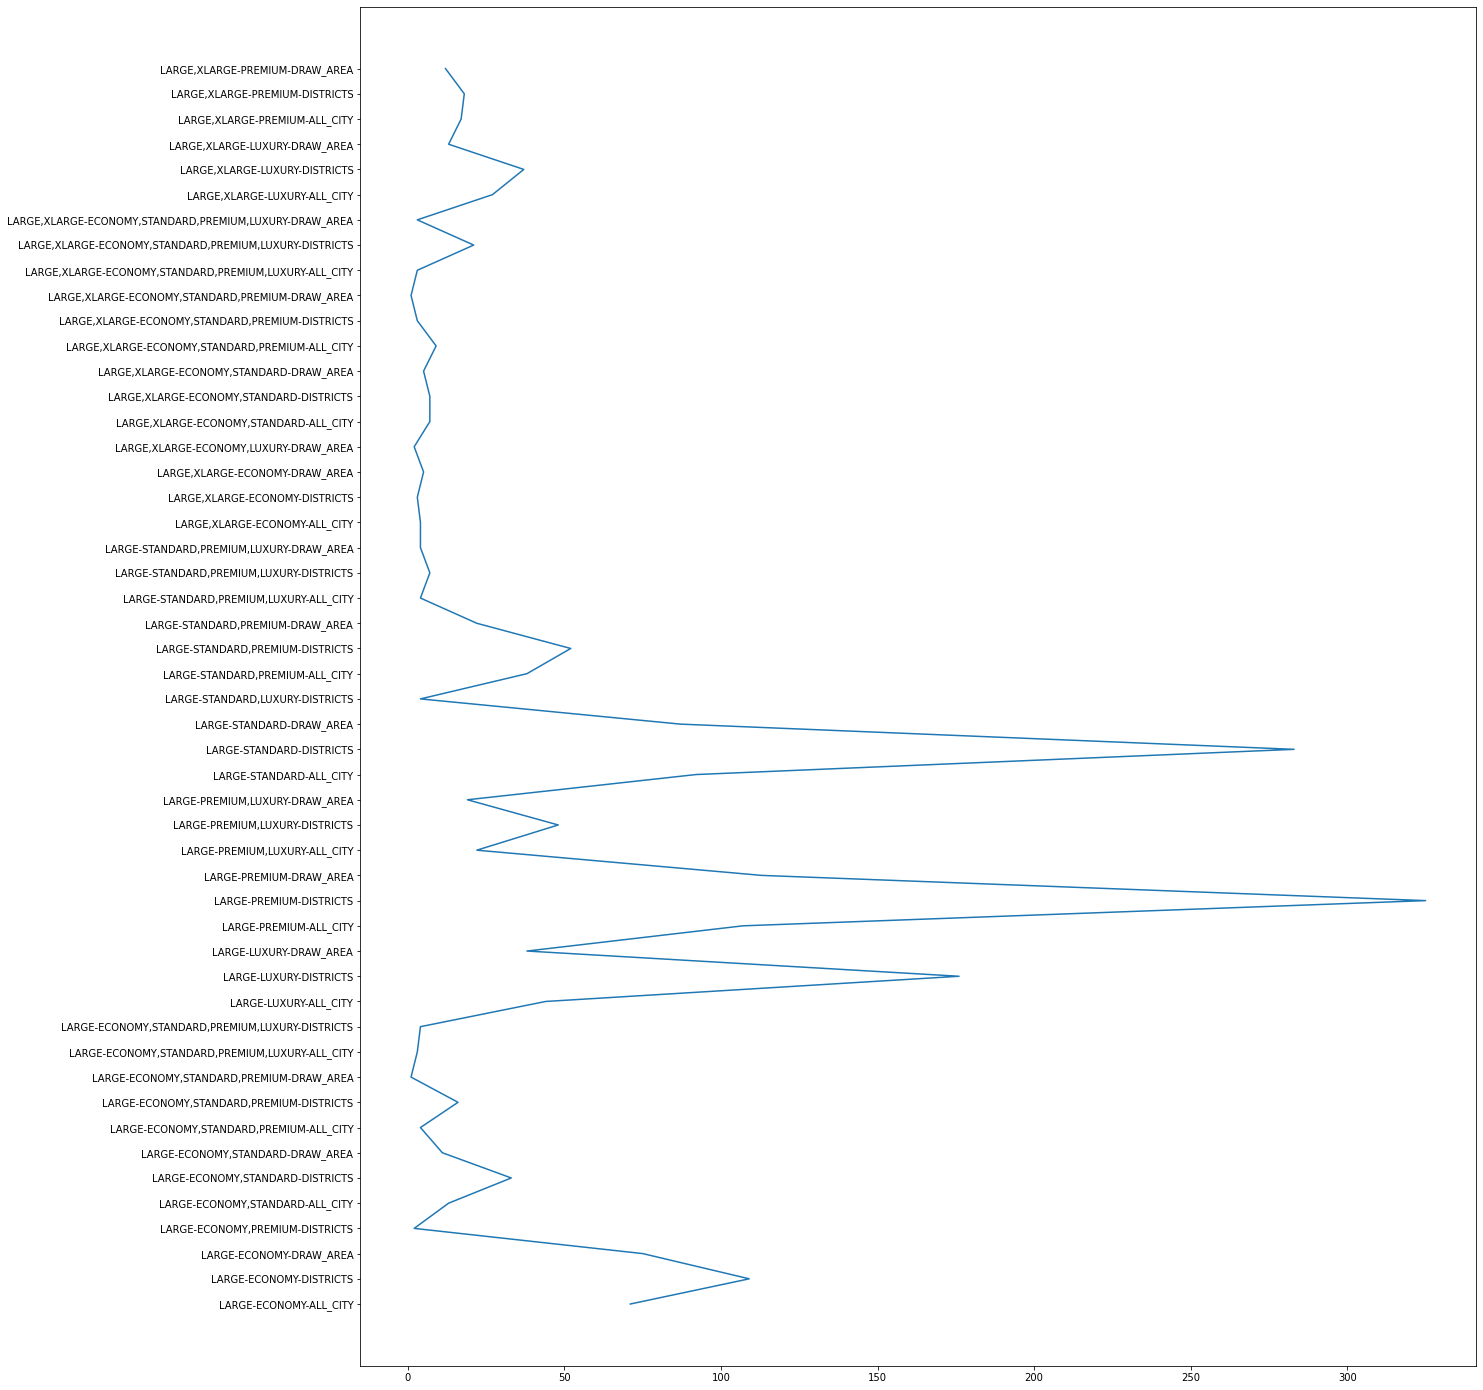

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,25))

plt.plot(display["nb_customer"].values[0:50], display["abscice"].values[0:50])
plt.show()

We can see that users who choose the size "XLARGE", Budget "STANDARD,PREMIUM,LUXURY" and area "DRAW_AREA" are all interested to Terrace

## 1- Users Extras

In [184]:
common_extras = group_data[["Size","Budget","Area","Nice","nb_customer"]]
common_extras["top_5_most_common_extras"] = common_extras.apply(lambda x: most_common(x), axis=1)
common_extras

/home/komlan/pythonEnv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Size,Budget,Area,Nice,nb_customer,top_5_most_common_extras
0,LARGE,ECONOMY,ALL_CITY,",,,Swimming Pool,,,,,Double Glazed Windows,Bat...",71,"[[, 80.28%], [Swimming Pool, 7.04%], [Sea View..."
1,LARGE,ECONOMY,DISTRICTS,",Storey,Bath in Suite,Armored Door,Swimming Po...",109,"[[, 86.24%], [Swimming Pool, 6.42%], [Bathtub,..."
2,LARGE,ECONOMY,DRAW_AREA,",,,,,,,,,,,,,,,Garden,Swimming Pool,Sea View,N...",75,"[[, 89.33%], [Pets Allowed, 4.0%], [Garden, 4...."
3,LARGE,"ECONOMY,PREMIUM",DISTRICTS,"Garden,Fireplace,Sea View,Bathtub,Natural Gas,...",2,"[[Sea View, 100.0%], [Fireplace, 50.0%], [Bath..."
4,LARGE,"ECONOMY,STANDARD",ALL_CITY,",,Pets Allowed,,,,,,,,,,",13,"[[, 92.31%], [Pets Allowed, 7.69%]]"
...,...,...,...,...,...,...
306,XLARGE,"STANDARD,PREMIUM",DISTRICTS,",Swimming Pool,Mountain View,Sea View,,Bath in...",8,"[[, 75.0%], [Swimming Pool, 25.0%], [Sea View,..."
307,XLARGE,"STANDARD,PREMIUM",DRAW_AREA,",,",3,"[[, 100.0%]]"
308,XLARGE,"STANDARD,PREMIUM,LUXURY",ALL_CITY,",",2,"[[, 100.0%]]"
309,XLARGE,"STANDARD,PREMIUM,LUXURY",DISTRICTS,",,,,",5,"[[, 100.0%]]"


We can see that as example that the users who choose the size "LARGE", Budget "ECONOMY,PREMIUM" and area "DISTRICTS" are all interested to Sea View